Get data

In [1]:
import requests
from bs4 import BeautifulSoup
import json
import re
from masquer import masq
import time
import random
import advertools as adv

url = "https://p7hdnsd47u-dsn.algolia.net/1/indexes/prod_pim_v1_index/query?x-algolia-agent=Algolia%20for%20JavaScript%20(4.15.0)%3B%20Browser%20(4.15.0)"

hits_ls = list()

i = 0
try:
    while i < 3: # just scrape 3
        useragent = masq(
                    ua = True,  # user-agent, defaults to True
                    rf = False,  # referer, defaults to False
                    hd = False,  # header-data, defaults to False
                )

        useragent['x-algolia-api-key'] = 'a6930b815bbc3cbc03dc89b48935baa0'
        useragent['x-algolia-application-id'] = 'P7HDNSD47U'

        # HEADER = {
        #     'Accept-Language':'en-GB,en-US;q=0.9,en;q=0.8',
        #     'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36',
        #     'x-algolia-api-key':'a6930b815bbc3cbc03dc89b48935baa0',
        #     'x-algolia-application-id':'P7HDNSD47U'
        # }

        payload = {
            "query": "",
            "getRankingInfo": True,
            "analytics": False,
            "clickAnalytics": False,
            "enableABTest": False,
            "hitsPerPage": 20,
            "attributesToRetrieve": ["*"],
            "attributesToSnippet": ["*:20"],
            "snippetEllipsisText": "…",
            "responseFields": ["*"],
            "explain": ["*"],
            "page": i,
            "maxValuesPerFacet": 100,
            "facets": ["*"],
            "facetFilters": [["categoryIds:812b6e47-d744-4ce4-ba06-13b0ebb10780"]],
            "numericFilters": []
        }

        # Send a GET request to the URL
        response = requests.post(url, headers=useragent, json=payload)

        # print(json.dumps(response.json()['hits'][0]))

        # Extract the first hit
        # print(response.json())
        hits = response.json()['hits']

        print(type(hits))

        hits_ls.extend(hits)
        
        time.sleep(random.randint(2,4))

        i += 1
        
finally:
    # Write the first hit to a JSON file
    with open('hits.json', 'w') as json_file:
        json.dump(hits_ls, json_file, indent=4)

<class 'list'>
<class 'list'>
<class 'list'>


Data cleaning

In [2]:
import pandas as pd
df = pd.DataFrame(hits_ls)

In [4]:
df.head()

,designFor,catchLine,components,characteristics,characteristicsToDisplay,gender,sport,context,smallUrl,otherImages,...,url_zh,colorName_zh,size_zh,categoriesHierarchical_en,categoriesHierarchical_zh,available,objectID,_snippetResult,_highlightResult,_rankingInfo
0,我們為一般騎乘設計與測試這款公路車。難以匹敵的舒適度，讓你騎得更遠、更頻繁。我們最舒適的公路車,我們最舒適的公路車，讓你騎得更遠、更頻繁。探索其液壓機械碟煞、特殊幾何結構與Shimano ...,[支架 (自行車): 100.0% [EN] Aluminium],"{'內建電池': {'value': '647', 'filters': ['不適用']},...","[{'name': '內建電池', 'value': '647', 'filters': [...",[男款],"[公路賽車, 單車旅行]",https://contents.mediadecathlon.com/p1612688/k...,https://contents.mediadecathlon.com/p1602971/k...,[https://contents.mediadecathlon.com/p1602969/...,...,/p/700c-rc-520-鋁合金版公路車-深藍色-triban-8544695.html,"abyss blue,smoked black,steel blue","[M, L, S]","{'lvl0': 'All sports', 'lvl1': 'All sports > C...","{'lvl0': '所有運動', 'lvl1': '所有運動 > 單車及滾軸運動', 'lv...",True,8544695,{'designFor': {'value': '我們為一般騎乘設計與測試這款公路車。難以匹...,"{'modelId': {'value': '8544695', 'matchLevel':...","{'nbTypos': 0, 'firstMatchedWord': 0, 'proximi..."
1,"想擁有可輕鬆操控的輕盈單車嗎？我們的16""自行車900是兒童進行騎行活動的絕佳選擇！",採用鋁合金零件，這款單車裝備齊全時僅重7.3 kg！搭配鏈條保護罩、腳撐及擋泥版，打造這款可...,[框架: 100.0% [EN] Aluminium],"{'內建電池': {'value': '647', 'filters': ['不附內建電池'...","[{'name': '內建電池', 'value': '647', 'filters': [...","[男童款, 女童款]",[兒童單車],https://contents.mediadecathlon.com/p2563298/k...,https://contents.mediadecathlon.com/p2526585/k...,[https://contents.mediadecathlon.com/p2095768/...,...,/p/16-兒童自行車-900-city-粉色-btwin-8802870.html,"ochre beige,pearl pink",[沒有尺碼],"{'lvl0': 'All sports', 'lvl1': 'All sports > C...","{'lvl0': '所有運動', 'lvl1': '所有運動 > 單車及滾軸運動', 'lv...",True,8802870,"{'designFor': {'value': '想擁有可輕鬆操控的輕盈單車嗎？我們的16""...","{'modelId': {'value': '8802870', 'matchLevel':...","{'nbTypos': 0, 'firstMatchedWord': 0, 'proximi..."
2,自行車Elops 100專為舒適輕鬆的城市通勤設計,舒適必備的荷蘭式城市車,[支架 (自行車): 100.0% 鋼],"{'內建電池': {'value': '647', 'filters': ['不適用']},...","[{'name': '內建電池', 'value': '647', 'filters': [...","[男款, 女款]",[城市單車],NO_URL/400x400,https://contents.mediadecathlon.com/p1325496/k...,[https://contents.mediadecathlon.com/p1355487/...,...,/p/tuc-100-elops-lf-黑色-elops-8480274.html,"black,black",[SM],"{'lvl0': 'All sports', 'lvl1': 'All sports > C...","{'lvl0': '所有運動', 'lvl1': '所有運動 > 單車及滾軸運動', 'lv...",True,8480274,{'designFor': {'value': '自行車Elops 100專為舒適輕鬆的城市...,"{'modelId': {'value': '8480274', 'matchLevel':...","{'nbTypos': 0, 'firstMatchedWord': 0, 'proximi..."
3,"一款簡單又堅固、附輔助輪的 14"" 自行車。","適合身高 90-110 cm 兒童的 14"" 單速自行車，配有輔助輪及簡單的鏈條保護罩。",[支架 (自行車): 100.0% [EN] Steel],"{'內建電池': {'value': '647', 'filters': ['不適用']},...","[{'name': '內建電池', 'value': '647', 'filters': [...","[男童款, 女童款]",[兒童單車],https://contents.mediadecathlon.com/p2652470/k...,https://contents.mediadecathlon.com/p2642368/k...,[https://contents.mediadecathlon.com/p2642391/...,...,/p/14-自行車-500-紅色-btwin-8646460.html,"black,bright red","[14""]","{'lvl0': 'All sports', 'lvl1': 'All sports > C...","{'lvl0': '所有運動', 'lvl1': '所有運動 > 單車及滾軸運動', 'lv...",True,8646460,"{'designFor': {'value': '一款簡單又堅固、附輔助輪的 14"" 自行車...","{'modelId': {'value': '8646460', 'matchLevel':...","{'nbTypos': 0, 'firstMatchedWord': 0, 'proximi..."
4,"想擁有可輕鬆操控的輕盈單車嗎？我們的16""自行車900是兒童進行騎行活動的絕佳選擇！",採用鋁合金零件，這款單車裝備齊全時僅重7.3 kg！搭配鏈條保護罩、腳撐及擋泥版，打造這款可...,[框架: 100.0% [EN] Aluminium],"{'內建電池': {'value': '647', 'filters': ['不附內建電池'...","[{'name': '內建電池', 'value': '647', 'filters': [...","[男童款, 女童款]",[兒童單車],https://contents.mediadecathlon.com/p1542693/k...,https://contents.mediadecathlon.com/p1664064/k...,[https://contents.mediadecathlon.com/p1664071/...,...,/p/16吋-hyc-900-超輕鋁合金兒童單車-紅色-btwin-8547757.html,scarlet red,[沒有尺碼],"{'lvl0': 'All sports', 'lvl1': 'All sports > C...","{'lvl0': '所有運動', 'lvl1': '所有運動 > 單車及滾軸運動', 'lv...",True,8547757,"{'designFor': {'value': '想擁有可輕鬆操控的輕盈單車嗎？我們的16""...","{'modelId': {'value': '8547757', 'matchLevel':...","{'nbTypos': 0, 'firstMatchedWord': 0, 'proximi..."


In [5]:
df.columns

Index(['designFor', 'catchLine', 'components', 'characteristics',
       'characteristicsToDisplay', 'gender', 'sport', 'context', 'smallUrl',
       'otherImages', 'otherModels', 'partnerName', 'popularity', 'modelId',
       'brand', 'sticker', 'productNature', 'name', 'stock', 'categoriesUrl',
       'priceBeforeDiscount', 'price', 'count', 'haveReview', 'categoryIds',
       'percentage', 'rating', 'shortname', 'url', 'items', 'availability',
       'superModelId', 'store', 'pickup', 'homeDelivery', 'size', 'color',
       'currency', 'designFor_en', 'catchLine_en', 'components_en',
       'characteristics_en', 'characteristicsToDisplay_en', 'gender_en',
       'sport_en', 'otherModels_en', 'sticker_en', 'productNature_en',
       'name_en', 'categoriesUrl_en', 'shortname_en', 'url_en',
       'supermodelUrl_en', 'size_en', 'colorName_en', 'designFor_zh',
       'catchLine_zh', 'components_zh', 'supermodelUrl_zh', 'otherModels_zh',
       'characteristics_zh', 'characteristicsToDis

Keep only english data

In [12]:
data = df.copy()
# keep only columns with _en
for col in data.columns:
    if col.endswith('_zh'):
        data.drop(col, axis=1, inplace=True)

df.head()

,designFor,catchLine,components,characteristics,characteristicsToDisplay,gender,sport,context,smallUrl,otherImages,...,url_zh,colorName_zh,size_zh,categoriesHierarchical_en,categoriesHierarchical_zh,available,objectID,_snippetResult,_highlightResult,_rankingInfo
0,我們為一般騎乘設計與測試這款公路車。難以匹敵的舒適度，讓你騎得更遠、更頻繁。我們最舒適的公路車,我們最舒適的公路車，讓你騎得更遠、更頻繁。探索其液壓機械碟煞、特殊幾何結構與Shimano ...,[支架 (自行車): 100.0% [EN] Aluminium],"{'內建電池': {'value': '647', 'filters': ['不適用']},...","[{'name': '內建電池', 'value': '647', 'filters': [...",[男款],"[公路賽車, 單車旅行]",https://contents.mediadecathlon.com/p1612688/k...,https://contents.mediadecathlon.com/p1602971/k...,[https://contents.mediadecathlon.com/p1602969/...,...,/p/700c-rc-520-鋁合金版公路車-深藍色-triban-8544695.html,"abyss blue,smoked black,steel blue","[M, L, S]","{'lvl0': 'All sports', 'lvl1': 'All sports > C...","{'lvl0': '所有運動', 'lvl1': '所有運動 > 單車及滾軸運動', 'lv...",True,8544695,{'designFor': {'value': '我們為一般騎乘設計與測試這款公路車。難以匹...,"{'modelId': {'value': '8544695', 'matchLevel':...","{'nbTypos': 0, 'firstMatchedWord': 0, 'proximi..."
1,"想擁有可輕鬆操控的輕盈單車嗎？我們的16""自行車900是兒童進行騎行活動的絕佳選擇！",採用鋁合金零件，這款單車裝備齊全時僅重7.3 kg！搭配鏈條保護罩、腳撐及擋泥版，打造這款可...,[框架: 100.0% [EN] Aluminium],"{'內建電池': {'value': '647', 'filters': ['不附內建電池'...","[{'name': '內建電池', 'value': '647', 'filters': [...","[男童款, 女童款]",[兒童單車],https://contents.mediadecathlon.com/p2563298/k...,https://contents.mediadecathlon.com/p2526585/k...,[https://contents.mediadecathlon.com/p2095768/...,...,/p/16-兒童自行車-900-city-粉色-btwin-8802870.html,"ochre beige,pearl pink",[沒有尺碼],"{'lvl0': 'All sports', 'lvl1': 'All sports > C...","{'lvl0': '所有運動', 'lvl1': '所有運動 > 單車及滾軸運動', 'lv...",True,8802870,"{'designFor': {'value': '想擁有可輕鬆操控的輕盈單車嗎？我們的16""...","{'modelId': {'value': '8802870', 'matchLevel':...","{'nbTypos': 0, 'firstMatchedWord': 0, 'proximi..."
2,自行車Elops 100專為舒適輕鬆的城市通勤設計,舒適必備的荷蘭式城市車,[支架 (自行車): 100.0% 鋼],"{'內建電池': {'value': '647', 'filters': ['不適用']},...","[{'name': '內建電池', 'value': '647', 'filters': [...","[男款, 女款]",[城市單車],NO_URL/400x400,https://contents.mediadecathlon.com/p1325496/k...,[https://contents.mediadecathlon.com/p1355487/...,...,/p/tuc-100-elops-lf-黑色-elops-8480274.html,"black,black",[SM],"{'lvl0': 'All sports', 'lvl1': 'All sports > C...","{'lvl0': '所有運動', 'lvl1': '所有運動 > 單車及滾軸運動', 'lv...",True,8480274,{'designFor': {'value': '自行車Elops 100專為舒適輕鬆的城市...,"{'modelId': {'value': '8480274', 'matchLevel':...","{'nbTypos': 0, 'firstMatchedWord': 0, 'proximi..."
3,"一款簡單又堅固、附輔助輪的 14"" 自行車。","適合身高 90-110 cm 兒童的 14"" 單速自行車，配有輔助輪及簡單的鏈條保護罩。",[支架 (自行車): 100.0% [EN] Steel],"{'內建電池': {'value': '647', 'filters': ['不適用']},...","[{'name': '內建電池', 'value': '647', 'filters': [...","[男童款, 女童款]",[兒童單車],https://contents.mediadecathlon.com/p2652470/k...,https://contents.mediadecathlon.com/p2642368/k...,[https://contents.mediadecathlon.com/p2642391/...,...,/p/14-自行車-500-紅色-btwin-8646460.html,"black,bright red","[14""]","{'lvl0': 'All sports', 'lvl1': 'All sports > C...","{'lvl0': '所有運動', 'lvl1': '所有運動 > 單車及滾軸運動', 'lv...",True,8646460,"{'designFor': {'value': '一款簡單又堅固、附輔助輪的 14"" 自行車...","{'modelId': {'value': '8646460', 'matchLevel':...","{'nbTypos': 0, 'firstMatchedWord': 0, 'proximi..."
4,"想擁有可輕鬆操控的輕盈單車嗎？我們的16""自行車900是兒童進行騎行活動的絕佳選擇！",採用鋁合金零件，這款單車裝備齊全時僅重7.3 kg！搭配鏈條保護罩、腳撐及擋泥版，打造這款可...,[框架: 100.0% [EN] Aluminium],"{'內建電池': {'value': '647', 'filters': ['不附內建電池'...","[{'name': '內建電池', 'value': '647', 'filters': [...","[男童款, 女童款]",[兒童單車],https://contents.mediadecathlon.com/p1542693/k...,https://contents.mediadecathlon.com/p1664064/k...,[https://contents.mediadecathlon.com/p1664071/...,...,/p/16吋-hyc-900-超輕鋁合金兒童單車-紅色-btwin-8547757.html,scarlet red,[沒有尺碼],"{'lvl0': 'All sports', 'lvl1': 'All sports > C...","{'lvl0': '所有運動', 'lvl1': '所有運動 > 單車及滾軸運動', 'lv...",True,8547757,"{'designFor': {'value': '想擁有可輕鬆操控的輕盈單車嗎？我們的16""...","{'modelId': {'value': '8547757', 'matchLevel':...","{'nbTypos': 0, 'firstMatchedWord': 0, 'proximi..."


In [13]:
# if same column have _en, keep only _en
for col in data.columns:
    if col.endswith('_en'):
        col_name = col[:-3]
        if col_name in data.columns:
            data.drop(col_name, axis=1, inplace=True)
            
data.head()

,context,smallUrl,otherImages,partnerName,popularity,modelId,brand,stock,priceBeforeDiscount,price,...,url_en,supermodelUrl_en,size_en,colorName_en,categoriesHierarchical_en,available,objectID,_snippetResult,_highlightResult,_rankingInfo
0,https://contents.mediadecathlon.com/p1612688/k...,https://contents.mediadecathlon.com/p1602971/k...,[https://contents.mediadecathlon.com/p1602969/...,DECATHLON,0.077856,8544695,TRIBAN,"{'definition': 'Available', 'color': '#00A319'...",5499.0,5499.0,...,/p/triban-rc-520-cycle-road-bike-cn-triban-854...,/p/triban-rc-520-cycle-road-bike-cn-triban-306...,"[M, L, S]","abyss blue,smoked black,steel blue","{'lvl0': 'All sports', 'lvl1': 'All sports > C...",True,8544695,{'designFor': {'value': '我們為一般騎乘設計與測試這款公路車。難以匹...,"{'modelId': {'value': '8544695', 'matchLevel':...","{'nbTypos': 0, 'firstMatchedWord': 0, 'proximi..."
1,https://contents.mediadecathlon.com/p2563298/k...,https://contents.mediadecathlon.com/p2526585/k...,[https://contents.mediadecathlon.com/p2095768/...,DECATHLON,0.070525,8802870,BTWIN,"{'definition': 'Available', 'color': '#00A319'...",999.0,999.0,...,/p/16-900-city-pink-cn-btwin-8802870.html,/p/16-900-city-pink-cn-btwin-306477.html,[No Size],"ochre beige,pearl pink","{'lvl0': 'All sports', 'lvl1': 'All sports > C...",True,8802870,"{'designFor': {'value': '想擁有可輕鬆操控的輕盈單車嗎？我們的16""...","{'modelId': {'value': '8802870', 'matchLevel':...","{'nbTypos': 0, 'firstMatchedWord': 0, 'proximi..."
2,NO_URL/400x400,https://contents.mediadecathlon.com/p1325496/k...,[https://contents.mediadecathlon.com/p1355487/...,DECATHLON,0.068463,8480274,ELOPS,"{'definition': 'Available', 'color': '#00A319'...",899.0,899.0,...,/p/26-elops-100-city-bike-black-elops-8480274....,/p/26-elops-100-city-bike-black-elops-153771.html,[SM],"black,black","{'lvl0': 'All sports', 'lvl1': 'All sports > C...",True,8480274,{'designFor': {'value': '自行車Elops 100專為舒適輕鬆的城市...,"{'modelId': {'value': '8480274', 'matchLevel':...","{'nbTypos': 0, 'firstMatchedWord': 0, 'proximi..."
3,https://contents.mediadecathlon.com/p2652470/k...,https://contents.mediadecathlon.com/p2642368/k...,[https://contents.mediadecathlon.com/p2642391/...,DECATHLON,0.061077,8646460,BTWIN,"{'definition': 'Available', 'color': '#00A319'...",599.0,599.0,...,/p/14-bike-500-red-cn-btwin-8646460.html,/p/14-bike-500-red-cn-btwin-333339.html,"[14""]","bright red,smoked black","{'lvl0': 'All sports', 'lvl1': 'All sports > C...",True,8646460,"{'designFor': {'value': '一款簡單又堅固、附輔助輪的 14"" 自行車...","{'modelId': {'value': '8646460', 'matchLevel':...","{'nbTypos': 0, 'firstMatchedWord': 0, 'proximi..."
4,https://contents.mediadecathlon.com/p1542693/k...,https://contents.mediadecathlon.com/p1664064/k...,[https://contents.mediadecathlon.com/p1664071/...,DECATHLON,0.055925,8547757,BTWIN,"{'definition': 'Available', 'color': '#00A319'...",999.0,999.0,...,/p/16-hyc-900-aluminium-bike-red-btwin-8547757...,/p/16-hyc-900-aluminium-bike-red-btwin-306477....,[No Size],scarlet red,"{'lvl0': 'All sports', 'lvl1': 'All sports > C...",True,8547757,"{'designFor': {'value': '想擁有可輕鬆操控的輕盈單車嗎？我們的16""...","{'modelId': {'value': '8547757', 'matchLevel':...","{'nbTypos': 0, 'firstMatchedWord': 0, 'proximi..."


In [15]:
data[["_snippetResult","_rankingInfo","_highlightResult","objectID"]].head()

,_snippetResult,_rankingInfo,_highlightResult,objectID
0,{'designFor': {'value': '我們為一般騎乘設計與測試這款公路車。難以匹...,"{'nbTypos': 0, 'firstMatchedWord': 0, 'proximi...","{'modelId': {'value': '8544695', 'matchLevel':...",8544695
1,"{'designFor': {'value': '想擁有可輕鬆操控的輕盈單車嗎？我們的16""...","{'nbTypos': 0, 'firstMatchedWord': 0, 'proximi...","{'modelId': {'value': '8802870', 'matchLevel':...",8802870
2,{'designFor': {'value': '自行車Elops 100專為舒適輕鬆的城市...,"{'nbTypos': 0, 'firstMatchedWord': 0, 'proximi...","{'modelId': {'value': '8480274', 'matchLevel':...",8480274
3,"{'designFor': {'value': '一款簡單又堅固、附輔助輪的 14"" 自行車...","{'nbTypos': 0, 'firstMatchedWord': 0, 'proximi...","{'modelId': {'value': '8646460', 'matchLevel':...",8646460
4,"{'designFor': {'value': '想擁有可輕鬆操控的輕盈單車嗎？我們的16""...","{'nbTypos': 0, 'firstMatchedWord': 0, 'proximi...","{'modelId': {'value': '8547757', 'matchLevel':...",8547757


In [16]:
data.columns

Index(['context', 'smallUrl', 'otherImages', 'partnerName', 'popularity',
       'modelId', 'brand', 'stock', 'priceBeforeDiscount', 'price', 'count',
       'haveReview', 'categoryIds', 'percentage', 'rating', 'items',
       'availability', 'superModelId', 'store', 'pickup', 'homeDelivery',
       'color', 'currency', 'designFor_en', 'catchLine_en', 'components_en',
       'characteristics_en', 'characteristicsToDisplay_en', 'gender_en',
       'sport_en', 'otherModels_en', 'sticker_en', 'productNature_en',
       'name_en', 'categoriesUrl_en', 'shortname_en', 'url_en',
       'supermodelUrl_en', 'size_en', 'colorName_en',
       'categoriesHierarchical_en', 'available', 'objectID', '_snippetResult',
       '_highlightResult', '_rankingInfo'],
      dtype='object')

EDA

In [21]:
def extract_name(sticker_list):
    if sticker_list:
        return [sticker['name'] for sticker in sticker_list if 'name' in sticker]
    return []

In [22]:
df['sticker_name'] = df['sticker_en'].apply(extract_name)

In [23]:
# change list in sticker_name to string
df['sticker_name'] = df['sticker_name'].apply(lambda x: ', '.join(x))

In [24]:
df['sticker_name'] 

0                               PRICE DROP
1     LIGHTWEIGHT, PRICE DROP, COMBO DEALS
2                                         
3                  PRICE DROP, COMBO DEALS
4     COMBO DEALS, LIGHTWEIGHT, PRICE DROP
5                                         
6                               PRICE DROP
7                  PRICE DROP, COMBO DEALS
8                  COMBO DEALS, PRICE DROP
9                               PRICE DROP
10                                        
11                              PRICE DROP
12                              PRICE DROP
13                              PRICE DROP
14                              PRICE DROP
15                              PRICE DROP
16                              PRICE DROP
17                              PRICE DROP
18                                        
19                              PRICE DROP
20                              PRICE DROP
21                                        
22                              PRICE DROP
23         

In [25]:
word_freq = adv.word_frequency(text_list=df['sticker_name'],
                               num_list=df.index)

# try sorting by 'abs_freq', 'wtd_freq', and 'rel_value':
word_freq.sort_values(by='abs_freq', ascending=False).head(25)

,word,abs_freq,wtd_freq,rel_value
1,price,20,244,12.0
2,drop,20,244,12.0
0,sale,10,378,38.0
3,combo,5,23,5.0
4,deals,5,23,5.0
5,lightweight,2,5,2.0


In [33]:
df["price"] = df["price"].astype(float)
df["price"].describe()

count       60.000000
mean      3497.750000
std       3692.687054
min        349.000000
25%       1008.750000
50%       1930.000000
75%       5488.000000
max      19800.000000
Name: price, dtype: float64

/var/folders/q0/_0rtydgs5054zvrtc9chq5_m0000gn/T/ipykernel_13096/2328355758.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


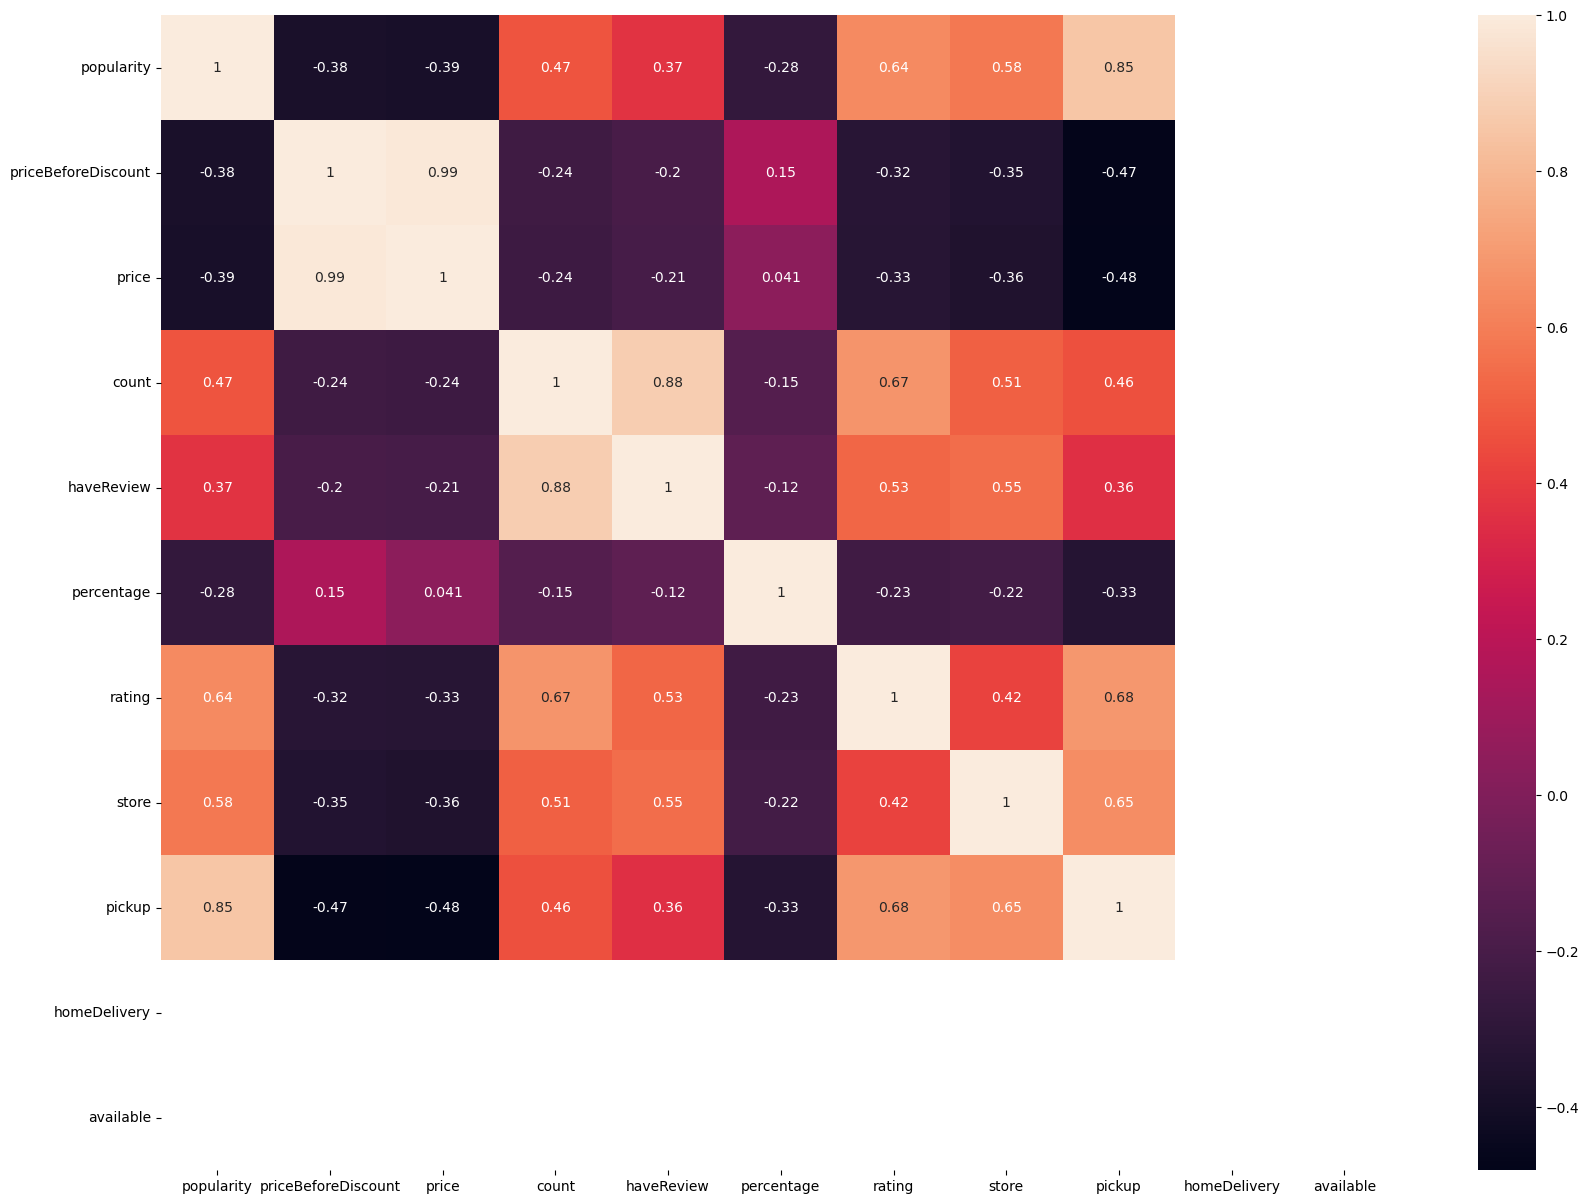

In [31]:
# Plot correlation matrix
corr_matrix = data.corr() 

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Funtion for all data cleaning

In [ ]:
def transform_data(hits_ls):
    data = pd.DataFrame(hits_ls)
    
    # keep only columns with _en
    for col in data.columns:
        if col.endswith('_zh'):
            data.drop(col, axis=1, inplace=True)
            
    # if same column have _en, keep only _en
    for col in data.columns:
        if col.endswith('_en'):
            col_name = col[:-3]
            if col_name in data.columns:
                data.drop(col_name, axis=1, inplace=True)
                
    data.drop("_snippetResult", axis=1, inplace=True)
    data.drop("_rankingInfo", axis=1, inplace=True)
    data.drop("_highlightResult", axis=1, inplace=True)
    data.drop("objectID", axis=1, inplace=True)
    return data

In [ ]:
df = transform_data(hits_ls)